<a href="https://colab.research.google.com/github/leegyuhi/oooooooooooooh/blob/master/curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#필요한 함수 import
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy

In [0]:
from scipy.optimize import curve_fit

#평형선 2차 fitting
def equilibrium(x, a, b, c):
	return a*x**2+b*x+c
popt, pcov = curve_fit(equilibrium, x1, y1)
print(popt)

[-0.52823308  1.50820635  0.00958757]


Text(0, 0.5, 'y')

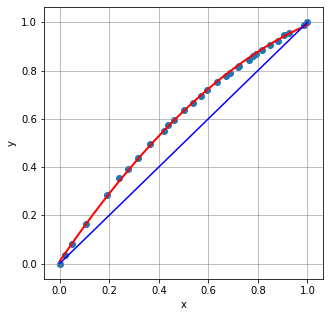

In [0]:
x1 = [0,0.0207,0.0517,0.1063,0.1914,0.2399,0.2761,0.3149,0.3653,0.4221,0.4359,0.4626,0.4999,0.5383,0.5699,0.5941,
      0.6334,0.6721,0.6869,0.7197,0.7222,0.7639,0.7795,0.7906,0.8167,0.8506,0.8791,0.9049,0.9266,0.9843,1]
y1 = [0,0.034,0.08232,0.1652,0.2851,0.3528,0.3932,0.4366,0.4948,0.5513,0.5738,0.5964,0.6355,0.6662,0.6961,0.7179,
      0.7535,0.7778,0.7903,0.8151,0.8201,0.8424,0.8595,0.869,0.887,0.9055,0.9237,0.9469,0.9572,0.9905,1]

x2 = np.linspace(0, 1, 30)
y2 = x2

fig, ax = plt.subplots(figsize=(5,5))

plt.plot(x2, equilibrium(x2, *popt), color='red', linewidth=2)
ax.plot(x2, y2, color="blue")
plt.scatter(x1, y1)

ax.grid(color="gray", which="both", ls='-', lw=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")

In [0]:
from scipy.optimize import curve_fit

#평형선 3차 fitting
def equilibrium(x, a, b, c, d):
	return a*x**3+b*x**2+c*x+d
popt, pcov = curve_fit(equilibrium, x1, y1)
print(popt)
print(pcov)

[ 2.46373294e-01 -8.99578389e-01  1.65400289e+00 -1.19504548e-04]
[[ 4.75564043e-04 -7.16792656e-04  2.81424889e-04 -1.87373287e-05]
 [-7.16792656e-04  1.11356868e-03 -4.57457545e-04  3.36608279e-05]
 [ 2.81424889e-04 -4.57457545e-04  2.02482203e-04 -1.79485141e-05]
 [-1.87373287e-05  3.36608279e-05 -1.79485141e-05  2.63383956e-06]]


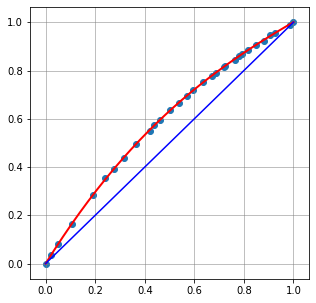

In [0]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(x2, equilibrium(x2, *popt), color='red', linewidth=2)
ax.plot(x2, y2, color="blue")
plt.scatter(x1, y1)

ax.grid(color="gray", which="both", ls='-', lw=0.5)

In [0]:
T=[450.6,450.0,449.3,448.0,446.0,444.9,444.2,443.4,442.1,441.1,440.6,440.0,439.3,438.4,437.6,437.1,436.3,435.6,435.3,434.6,434.4,433.6,433.2,433.0,432.5,431.8,431.3,430.6,430.2,429.5,429.4]

In [0]:
print(len(x1))
print(len(y1))
print(len(T))

31
31
31


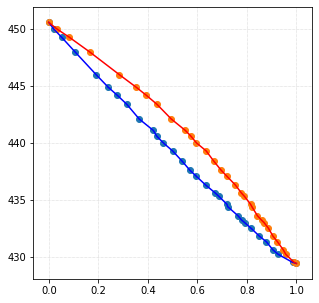

In [0]:
fig, ax = plt.subplots(figsize=(5, 5))

#기포점
ax.plot(x1, T, color="blue", label="y(x)")
ax.plot(y1, T, color="red", label="y'(x)")
ax.grid(which="both", ls=':', lw=0.5)
plt.scatter(x1, T)
plt.scatter(y1, T)

[-1.36605269e-05  1.82561380e-02 -8.17642995e+00  1.22736199e+03]
[-2.32547726e-05  2.97511974e-02 -1.27190789e+01  1.81809461e+03]


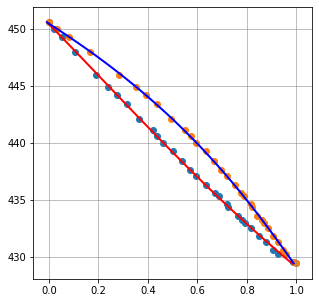

In [0]:
#기포점 선도 fitting
def dewpoint(x, a, b, c, d):
  return a*x**3+b*x**2+c*x+d
popt2, pcov2 = curve_fit(dewpoint, T, x1)
print(popt2)

def boilingpoint(x, a, b, c, d):
  return a*x**3+b*x**2+c*x+d
popt3, pcov3 = curve_fit(boilingpoint, T, y1)
print(popt3)

T_0 = np.linspace(450.6, 429.4, 30)

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(dewpoint(T_0, *popt2), T_0, color='red', linewidth=2)
plt.plot(boilingpoint(T_0, *popt3), T_0, color='blue', linewidth=2)
plt.scatter(x1, T)
plt.scatter(y1, T)

ax.grid(color="gray", which="both", ls='-', lw=0.5)

In [0]:
Rd=3

xf=0.5
xd=0.95
xb=0.02
x_rectify=np.linspace(0.5,0.95,30)
x_remove=np.linspace(0.02,0.5,30)
x=np.linspace(0, 1, 30)

def eqb(x):
  return 0.246*x**3-0.900*x**2+1.654*x-1.195e-4
def rectify(x):
  return (xd-xd/(Rd+1))/xd*x+xd/(Rd+1)
def remove(x):
  return (rectify(xf)-xb)/(xf-xb)*(x-xb)+xb


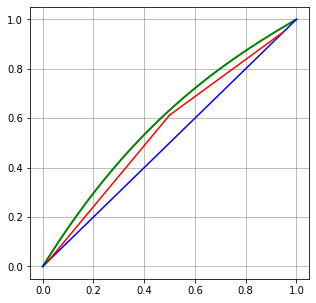

In [0]:
ig, ax = plt.subplots(figsize=(5, 5))

plt.plot(x, eqb(x), color='green', linewidth=2)
ax.plot(x, x, color="blue")
ax.plot(x_rectify, rectify(x_rectify), color="red")
ax.plot(x_remove, remove(x_remove), color="red")

ax.grid(color="gray", which="both", ls='-', lw=0.5)

In [0]:
#McCabe Thiele 법 (출처 : https://github.com/mohsinulhaq/McCabe-Thiele-method/blob/master/graph.py)

import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString


def mole_fraction(weight_fraction):
    return (weight_fraction/78)/(weight_fraction/78 + (100 - weight_fraction)/92)


def intersection(x1_array, y1_array, x2_array, y2_array):
    line1 = LineString([i for i in zip(x1_array, y1_array)])
    line2 = LineString([i for i in zip(x2_array, y2_array)])
    x_inter = line1.intersection(line2).x
    y_inter = line1.intersection(line2).y
    return x_inter, y_inter


def line(x_inter, y_inter, slope, length, perp=False):
    if perp:
        x_inter, y_inter = y_inter, x_inter
    x_array = [x_inter - i / 10 for i in range(length)]
    y_array = [y_inter]
    for i in range(1, length):
        y_inter -= slope * 0.1
        y_array.append(y_inter)
    if perp:
        return y_array, x_array
    else:
        return x_array, y_array


x = y = np.arange(0, 1.1, 0.1)
y_curve = [0, 0.21, 0.38, 0.511, 0.627, 0.719, 0.79, 0.853, 0.91, 0.961, 1]
y_straight = x
count = 0

residue_percentage = 100 - float(input('Enter residue composition %: '))
feed_percentage = float(input('Enter feed composition %: '))
distillate_percentage = float(input('Enter distillate composition %: '))
q = eval(input('Enter mole fraction of liquid in feed (q): '))
reflux_ratio = float(input('Enter the reflux ratio (R/Rm): '))

xw = mole_fraction(residue_percentage)
xf = mole_fraction(feed_percentage)
xd = mole_fraction(distillate_percentage)
slope = q/(q-1)

plt.title('McCabe-Thiele method')
plt.xlabel('Mole fraction of lighter component in liquid phase')
plt.ylabel('Mole fraction of lighter component in vapor phase')
plt.plot(x, x, color='black')  # y=x
plt.plot(x, y_curve, color='black')  # curve
plt.plot([xw] * 11, y_straight, color='red', linestyle='dashed')  # xw
plt.plot([xf] * 11, y_straight, color='red', linestyle='dashed')  # xf
plt.plot([xd] * 11, y_straight, color='red', linestyle='dashed')  # xd

plt.text(xf, -0.04, 'xf')
plt.text(xw, -0.04, 'xw')
plt.text(xd, -0.04, 'xd')

# xw line
xw_inter, yw_inter = intersection(x, y, [xw] * 11, y_straight)
# xf line
xf_inter, yf_inter = intersection(x, y, [xf] * 11, y_straight)
# xd line
xd_inter, yd_inter = intersection(x, y, [xd] * 11, y_straight)

x_inter_array, y_inter_array = line(xf_inter, yf_inter, slope, 3)
plt.plot(x_inter_array, y_inter_array, color='blue')

x_inter2, y_inter2 = intersection(x_inter_array, y_inter_array, x, y_curve)
slope2 = (yd_inter - y_inter2)/(xd_inter - x_inter2)
rm = 1/(1 - slope2)
R = rm * reflux_ratio
slope3 = R/(R + 1)
x_inter_array2, y_inter_array2 = line(xd_inter, yd_inter, slope3, 8)
plt.plot(x_inter_array2, y_inter_array2, color='green')

x_inter5, y_inter5 = intersection(x_inter_array2, y_inter_array2, x_inter_array, y_inter_array)
slope4 = (yw_inter - y_inter5)/(xw_inter - x_inter5)
x_inter_array3, y_inter_array3 = line(x_inter5, y_inter5, slope4, 5)
plt.plot(x_inter_array3, y_inter_array3, color='purple')

x_inter_array, y_inter_array = line(xd_inter, yd_inter, 0, 4)
plt.plot(x_inter_array, y_inter_array, color='black')

while True:
    try:
        x_inter, y_inter = intersection(x_inter_array, y_inter_array, x, y_curve)
    except AttributeError:
        break
    x_inter_array, y_inter_array = line(x_inter, y_inter, 0, 4, True)
    plt.plot(x_inter_array, y_inter_array, color='black')
    count += 1

    try:
        x_inter, y_inter = intersection(x_inter_array, y_inter_array, x_inter_array2, y_inter_array2)
        if x_inter < x_inter5:
            break
    except AttributeError:
        break
    x_inter_array, y_inter_array = line(x_inter, y_inter, 0, 4)
    plt.plot(x_inter_array, y_inter_array, color='black')

while True:
    try:
        x_inter, y_inter = intersection(x_inter_array, y_inter_array, x_inter_array3, y_inter_array3)
        if x_inter < xw:
            break
    except AttributeError:
        break
    x_inter_array, y_inter_array = line(x_inter, y_inter, 0, 4)
    plt.plot(x_inter_array, y_inter_array, color='black')

    try:
        x_inter, y_inter = intersection(x_inter_array, y_inter_array, x, y_curve)
    except AttributeError:
        break
    x_inter_array, y_inter_array = line(x_inter, y_inter, 0, 4, True)
    plt.plot(x_inter_array, y_inter_array, color='black')
    count += 1

plt.text(0.4, 1.1, 'Number of trays = ' + str(count - 1))

plt.show()